In [1]:
import torch as th
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def weightedMSE(x, y, weights):
    return th.mean(weights*(x-y)**2)

In [84]:
sample_size = 10000
num_features = 4

x = th.rand(sample_size, num_features, dtype=float)

W = th.nn.Linear(4, 2, bias=False, dtype=float)
Wt = th.nn.Linear(2, 4, bias=True, dtype=float)
shared_weight = th.nn.Parameter(th.randn(2, 4, dtype=float))

W.weight = shared_weight
Wt.weight = th.nn.Parameter(shared_weight.t())

print(W.weight)
print(Wt.weight)

Parameter containing:
tensor([[ 0.9005, -0.5927, -0.3395, -0.1613],
        [-0.9082, -0.5463, -0.3710, -1.3865]], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([[ 0.9005, -0.9082],
        [-0.5927, -0.5463],
        [-0.3395, -0.3710],
        [-0.1613, -1.3865]], dtype=torch.float64, requires_grad=True)


In [108]:
learning_rate = 1.0e-3
importance = th.tensor([0.1, 0.5, 0.3, 0.1], requires_grad=False)

history = []

epochs = 10000
for epoch in range(epochs):
    latent = W(x)
    
    #x_rec = th.matmul(latent, W.weight)
    x_rec = F.relu(Wt(latent))
    
    loss = weightedMSE(x, x_rec, importance)
    loss.backward()

    history.append(loss.detach().numpy())
    
    with th.no_grad():
        W.weight -= learning_rate*W.weight.grad
        Wt.weight -= learning_rate*Wt.weight.grad
        Wt.bias -= learning_rate*Wt.bias.grad

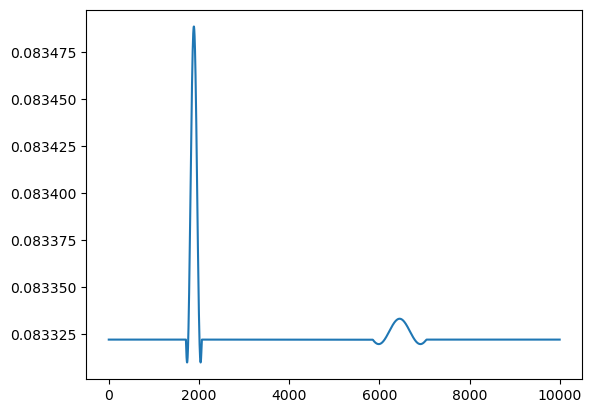

In [109]:
plt.plot(history)

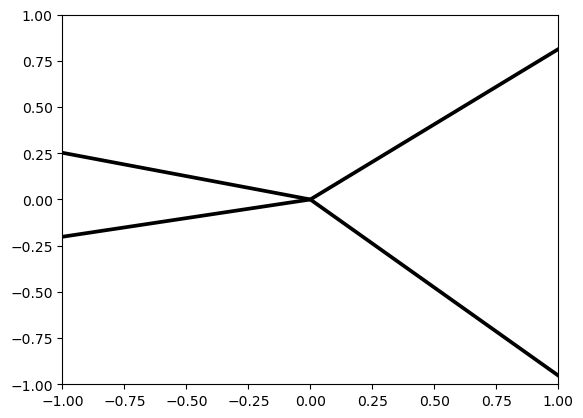

In [110]:
weight_landscape = W.weight.t().detach().numpy()

fig, ax = plt.subplots()

q = ax.quiver(np.zeros((4,1)),np.zeros((4,1)), weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1), angles='xy', scale_units='xy', scale=1)
plt.scatter(weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

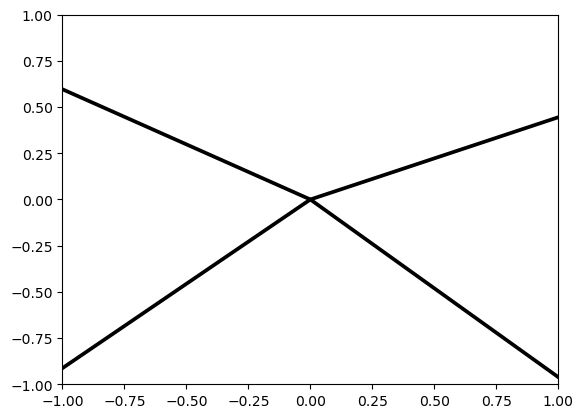

In [107]:
weight_landscape = W.weight.t().detach().numpy()

fig, ax = plt.subplots()

q = ax.quiver(np.zeros((4,1)),np.zeros((4,1)), weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1), angles='xy', scale_units='xy', scale=1)
plt.scatter(weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

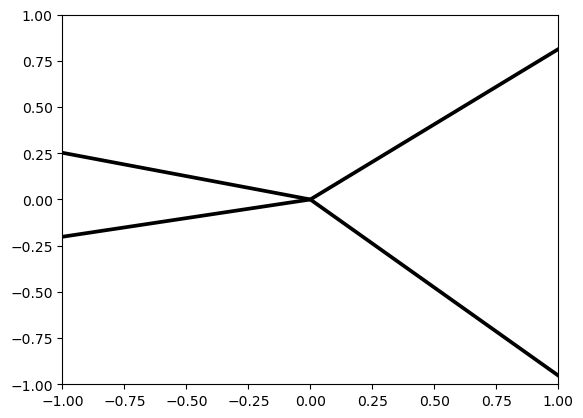

In [113]:
weight_landscape = W.weight.t().detach().numpy()

fig, ax = plt.subplots()

q = ax.quiver(np.zeros((4,1)),np.zeros((4,1)), weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1), angles='xy', scale_units='xy', scale=1)
plt.scatter(weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

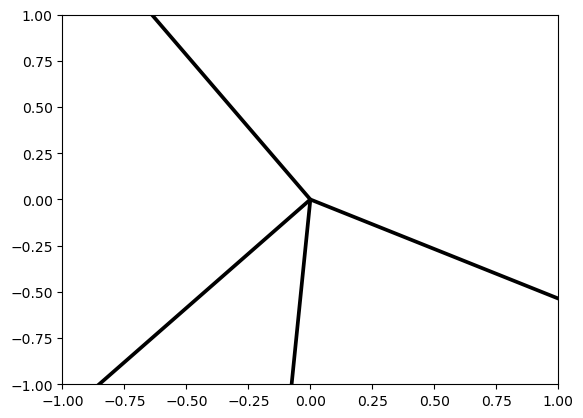

In [101]:
weight_landscape = W.weight.t().detach().numpy()

fig, ax = plt.subplots()

q = ax.quiver(np.zeros((4,1)),np.zeros((4,1)), weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1), angles='xy', scale_units='xy', scale=1)
plt.scatter(weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

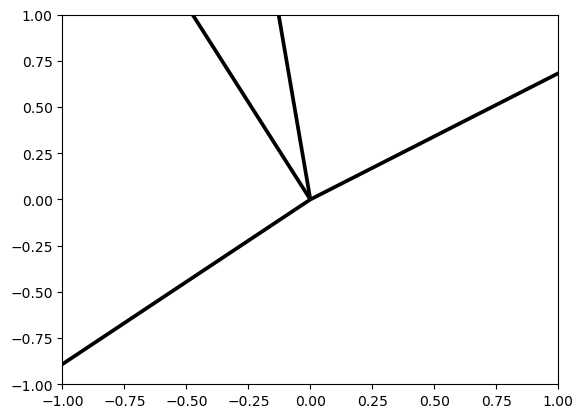

In [98]:
weight_landscape = W.weight.t().detach().numpy()

fig, ax = plt.subplots()

q = ax.quiver(np.zeros((4,1)),np.zeros((4,1)), weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1), angles='xy', scale_units='xy', scale=1)
plt.scatter(weight_landscape[:,0].reshape(-1,1),weight_landscape[:,1].reshape(-1,1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

In [93]:
W.weight

Parameter containing:
tensor([[-6.2175,  4.1139,  1.5055,  7.2243],
        [-5.2739,  5.7636, -0.5046,  2.4033]], dtype=torch.float64,
       requires_grad=True)

In [94]:
Wt.weight.t()

tensor([[-6.2175,  4.1139,  1.5055,  7.2243],
        [-5.2739,  5.7636, -0.5046,  2.4033]], dtype=torch.float64,
       grad_fn=<TBackward0>)

In [112]:
th.matmul(Wt.weight, W.weight)

tensor([[ 357.6799,   61.1002,  -86.2284, -218.1733],
        [  61.1002,  657.8748, -170.5224, -191.5914],
        [ -86.2284, -170.5224,   58.2760,   89.7311],
        [-218.1733, -191.5914,   89.7311,  169.8628]], dtype=torch.float64,
       grad_fn=<MmBackward0>)